In [49]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors # For intresting histes

In [50]:
df = pd.read_csv('data/regresion_data.csv')
df = df.drop(columns='Unnamed: 0')
# there is no frq if there are no aerodnamic circuit => 
# => if label != 1.
# then
index_names = df[(df['label'] == 0)].index
df.drop(index_names, inplace = True)
# Also, after that segregation by the label, we can drop label column
df = df.drop(columns='label')
print(df.head(10))

   axial_max   tang_max  index_of_axm  index_of_tnm  axial_in_mxt   
0 -16.549675 -17.654378            28            48    -10.975493  \
1 -16.564726 -17.815883            28            52    -14.410172   
2 -16.335568 -17.578816            28            50    -12.664116   
3 -15.968865 -17.108087            28            47    -10.236513   
4 -15.227270 -16.266240            28            49    -12.056063   
5 -14.682051 -15.377140            27            51    -13.252567   
6 -14.086215 -14.515554            27            50    -12.391912   
7 -13.962619 -13.729980            28            45     -9.941273   
8 -13.620183 -13.183838            27            44     -9.637045   
9 -12.883969 -11.235115            24            41     -8.141471   

   tang_in_mxa  cone_angl   frequancy  
0   -16.597827          4  126.984123  
1   -16.724255          4  126.984123  
2   -16.415995          4  125.152626  
3   -15.878571          4  120.879120  
4   -15.246275          4  114.774117  


In [51]:
df.corr()

,axial_max,tang_max,index_of_axm,index_of_tnm,axial_in_mxt,tang_in_mxa,cone_angl,frequancy
axial_max,1.000000,0.900749,-0.729426,-0.752424,0.602443,0.899512,0.213329,-0.883728
tang_max,0.900749,1.000000,-0.804928,-0.780352,0.524339,0.979297,0.144075,-0.931279
index_of_axm,-0.729426,-0.804928,1.000000,0.613799,-0.345900,-0.759659,-0.084282,0.740377
index_of_tnm,-0.752424,-0.780352,0.613799,1.000000,-0.899130,-0.836412,-0.228411,0.751852
axial_in_mxt,0.602443,0.524339,-0.345900,-0.899130,1.000000,0.594057,0.247548,-0.480937
tang_in_mxa,0.899512,0.979297,-0.759659,-0.836412,0.594057,1.000000,0.175369,-0.944057
cone_angl,0.213329,0.144075,-0.084282,-0.228411,0.247548,0.175369,1.000000,-0.074179
frequancy,-0.883728,-0.931279,0.740377,0.751852,-0.480937,-0.944057,-0.074179,1.000000


In [52]:
y = df['frequancy']
y.columns = 'frequancy'
X = df.drop(columns='frequancy', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=104, test_size=0.3, shuffle=True)
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

reg = LinearRegression()
reg.fit(X_train, y_train)
display(reg.score(X_test, y_test))


0.9155201509281296

In [53]:
# MSE and MSPE
linreg_pred = reg.predict(X_test)
mean_absolute_percentage_error(y_test, linreg_pred)

0.03887298291190839

In [54]:
model = ElasticNet()
model.fit(X_train, y_train)
display(model.score(X_test, y_test))

0.852540856502944

In [55]:
reg_pred = model.predict(X_test)
mean_absolute_percentage_error(y_test, reg_pred)

0.0598836836996756

In [56]:
print(df.shape[0])
print(reg_pred.shape[0])
print(reg_pred)

492
148
[127.78802693  78.0192383  113.53736849  80.04839717  86.6634743
  81.05386138  77.36471026  93.92863362  93.40478077  95.96494093
  82.49246848  74.77985984  87.04729789  93.14473493  80.42049826
  87.77878458  76.34465971 101.31852188 118.10330602  80.0738339
  84.3752282   92.82739743 101.30300458  82.85099819  84.59956544
 100.83018101 114.94591134 119.44828629  92.06793421  90.61866797
  83.08879464 116.36349037  90.32089779  74.16910096 110.22610585
  91.95591265 100.48425081  87.70976201 121.59831659 105.15573326
  99.6611161  116.08223571 108.88240182  94.14709531  87.3547685
 120.89448768  98.80441891 114.51860688 122.39015879  94.96001677
  96.64339886  74.869254   115.06322544  84.6927859   81.38293683
 119.27369467  92.85923589 120.14362981  95.71713481  87.99093841
  97.61619619 103.31035689 103.38069077  95.0778327   84.70379398
  98.70141584 109.03818211  97.42869396  92.47798311  89.57938639
 123.44488677  99.07270103  80.01897647 122.00543835  95.82284133
 108.

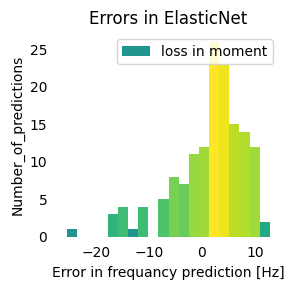

In [62]:
losses = reg_pred - y_test
#for i in range(reg_pred.shape[0]):
    #l = reg_pred[i] - y_test[i]

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors in ElasticNet')
 
# Show plot
plt.show()


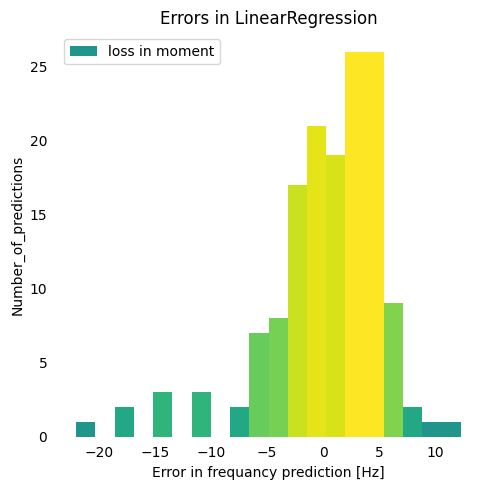

In [61]:
#Regression lost
losses = linreg_pred - y_test
#for i in range(reg_pred.shape[0]):
    #l = reg_pred[i] - y_test[i]

# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(5, 5),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors in LinearRegression')
 
# Show plot
plt.show()